In [1]:
#先輩のを模写してコードリーディング

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.datasets import mnist

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [36]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].dtype)

(60000, 28, 28)
(10000, 28, 28)
uint8


In [37]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255


enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

X_train_, X_val, y_train_, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

In [38]:
#Problem 1.

class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer 
        self.W = initializer.W(n_nodes1, n_nodes2)# initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.B = initializer.B(n_nodes2) 
        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """        
        self.X = X
        A = X@self.W + self.B
        return A
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        dZ = dA@self.W.T
        self.dB = np.sum(dA, axis =0)
        self.dW = self.X.T@dA
        self.optimizer.update(self)# 更新
        return dZ

In [39]:
#Problem 2.
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :(n_nodes1, n_nodes2)
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B : (n_nodes2, )
        """
        B = self.sigma * np.random.randn(n_nodes2)
        return B

In [40]:
#Problem .3
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        
        return

In [41]:
#Ploblem 4.

class Sigmoid:
    
    def forward(self, A):
        self.A = A
        return self.sigmoid(A)
    
    def backward(self, dZ):
        _sig = self.sigmoid(self.A)
        return dZ * (1 - _sig) * _sig
    
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

In [42]:
#Ploblem 4.

class Tanh:
    
    def forward(self, A):
        self.A = A
        return np.tanh(A)
    
    def backward(self, dZ):
        return dZ * (1 - (np.tanh(self.A))**2)

In [43]:
# Problem 4.

class Softmax:
    
    def forward(self, X):
        self.Z = np.exp(X) / np.sum(np.exp(X), axis =1).reshape(-1, 1)
        return self.Z
    
    def backward(self, Y):
        self.loss = self.loss_func(Y)
        return self.Z - Y
    
    def loss_func(self, Y, Z=None):
        """
        y_true : (n_samples, n_output)
        z : (n_samples, n_output)
        """
        if Z is None:
            Z = self.Z
        return (-1) * np.average(np.sum(Y * np.log(Z), axis =1))

In [44]:
#Problem 5.

class ReLU:
    def forward(self, A):
        self.A = A
        return np.clip(A, 0, None)
    
    def backward(self, dZ):
        return dZ * np.clip(np.sign(self.A), 0, None)

In [45]:
#Problem 6.

class XavierInitializer:
    def W(self, n_nodes1, n_nodes2):
        self.sigma = math.sqrt(1 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(n_nodes2)
        return B

In [52]:
class Heinitializer():
    def W(self, n_nodes1, n_nodes2):
        self.sigma = math.sqrt(2 / n_nodes1)
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn(n_nodes2)
        return B

In [47]:
#Problem 7.
class AdaGrad:

    def __init__(self, lr):
        self.lr = lr
        self.HW = 1
        self.HB = 1
        
    def update(self, layer):
        self.HW += layer.dW **2
        self.HB += layer.dB **2
        layer.W -= self.lr * np.sqrt(1 / self.HW) * layer.dW
        layer.B -= self.lr * np.sqrt(1 / self.HB) * layer.dB

In [54]:
#Problem 8.
class ScratchDeepNeuralNetworkClassifier:
    
    def __init__(self, num_epoch = 10, lr = 0.01, batch_size = 20,
                n_features = 784, n_nodes1 = 400, n_nodes2 = 600, n_nodes3 = 200, n_output = 10,
                verbose = True, activater =Tanh, optimizer = AdaGrad):
        self.num_epoch = num_epoch
        self.lr = lr
        self.verbose = verbose
        
        self.batch_size = batch_size #バッチサイズ
        self.n_features = n_features #特徴量の数
        self.n_nodes1 = n_nodes1 #1層目のノード数
        self.n_nodes2 = n_nodes2 #2層目のノード数
        self.n_nodes3 = n_nodes3
        self.n_output = n_output #出力のクラス数(3層目のノード数)
        
        self.activater = activater
        if activater == Sigmoid or activater == Tanh:
            self.initializer = XavierInitializer
        elif activater == ReLU:
            self.initializer = Heinitializer
        else:
            print('活性化関数が不適切')
        self.optimizer = optimizer
    
    def fit(self, X, y, X_val =None, y_val =None):
        
        self.val_enable = False
        if X_val is not None:
            self.val_enable = True
            
        #optimizer = self.optimizer(self.lr)
        self.FC1 = FC(self.n_features, self.n_nodes1, self.initializer(), self.optimizer(self.lr))
        self.activation1 = self.activater()
        self.FC2 = FC(self.n_nodes1, self.n_nodes2, self.initializer(), self.optimizer(self.lr))
        self.activation2 = self.activater()
        self.FC3 = FC(self.n_nodes2, self.n_nodes3, self.initializer(), self.optimizer(self.lr))
        self.activation3 = self.activater()
        self.FC4 = FC(self.n_nodes3, self.n_output, self.initializer(), self.optimizer(self.lr))
        self.activation4 = Softmax()
        
        self.loss = []
        self.loss_epoch = [self.activation4.loss_func(y, self.forward_propagation(X))]
        for _ in range(self.num_epoch):
            get_mini_batch = GetMiniBatch(X, y, batch_size = self.batch_size)
            self.iter = len(get_mini_batch)
            for mini_X, mini_y in get_mini_batch:
                self.forward_propagation(mini_X)
                self.back_propagation(mini_X, mini_y)
                self.loss.append(self.activation4.loss)
            self.loss_epoch.append(self.activation4.loss_func(y, self.forward_propagation(X)))
            
        if self.verbose:
            self.learning_curve()
            print()
            
    def predict(self, X):
        return np.argmax(self.forward_propagation(X), axis =1)
    
    def forward_propagation(self, X):
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        A4 = self.FC4.forward(Z3)
        Z4 = self.activation4.forward(A4)
        return Z4
    
    def back_propagation(self, X, y_true):
        dA4 = self.activation4.backward(y_true) #交差エントロピー誤差とソフトマックスを併せている
        dZ3 = self.FC4.backward(dA4)
        dA3 = self.activation3.backward(dZ3) 
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        dZ0 = self.FC1.backward(dA1) #dZ0は使用しない
        
    def learning_curve(self):
        plt.title('model loss')
        plt.xlabel('num_epoch')
        plt.ylabel('loss')
        plt.plot(np.arange(1, self.num_epoch * self.iter + 1), self.loss, label='train_loss')
        plt.plot(np.arange(0, self.num_epoch + 1) * self.iter, self.loss_epoch, label='epoch_loss')
        if self.val_enable:
            plt.plot(np.arange(1, self.num_epoch + 1), self.val_loss, label = 'val_loss')
        plt.legend()
        plt.show()
        return

In [49]:
# ミニバッチ処理のクラス
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=None):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
    def __len__(self):
        return self._stop
    
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1] 
    
    def __iter__(self):
        self._counter = 0
        return self
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [50]:
#Problem 9.
def evaluate(y_true, y_pred):
    print('accuracy = ', accuracy_score(y_true, y_pred))
    print('precision = ', precision_score(y_true, y_pred, average = 'macro'))
    print('recall = ', recall_score(y_true, y_pred, average = 'macro'))
    print('f1 = ', f1_score(y_true, y_pred, average= 'macro'))
    print(confusion_matrix(y_true, y_pred))

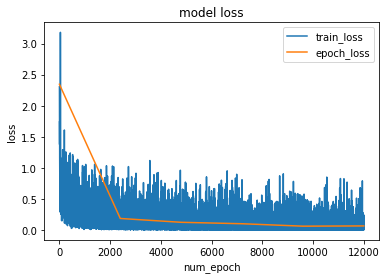

In [22]:
scratch_dnn1 = ScratchDeepNeuralNetworkClassifier(num_epoch=5, lr= 0.01, batch_size=20, 
                                                 n_features=784, n_nodes1 =400, n_nodes2=600, n_nodes3 =200,  n_output=10,
                                                 verbose = True, activater = Tanh, optimizer=SGD)

scratch_dnn1.fit(X_train_, y_train_)

In [23]:
y_pred1 = scratch_dnn1.predict(X_test)

In [24]:
evaluate(y_test, y_pred1)

accuracy =  0.966
precision =  0.9665220376121795
recall =  0.9653954485942814
f1 =  0.9655997746460722
[[ 966    0    6    0    0    3    0    1    3    1]
 [   0 1123    5    2    0    0    2    0    3    0]
 [   1    0 1012    5    2    0    2    9    1    0]
 [   0    0    5  997    0    1    0    5    1    1]
 [   0    0    5    0  966    0    1    6    0    4]
 [   2    0    2   24    0  850    2    1    6    5]
 [  13    2    6    0    4   21  906    1    4    1]
 [   0    4    8    2    4    0    0 1002    1    7]
 [   2    1    8   27    8    3    0   11  910    4]
 [   3    6    1   18   42    2    0    9    0  928]]


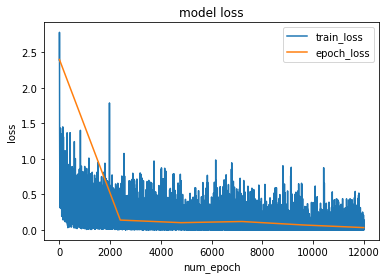

In [25]:
scratch_dnn2 = ScratchDeepNeuralNetworkClassifier(num_epoch=5, lr= 0.01, batch_size=20, 
                                                 n_features=784, n_nodes1 =400, n_nodes2=300, n_nodes3 =200,  n_output=10,
                                                 verbose = True, activater = Tanh, optimizer=SGD)

scratch_dnn2.fit(X_train_, y_train_)

In [26]:
y_pred2 = scratch_dnn2.predict(X_test)

In [27]:
evaluate(y_test, y_pred2)

accuracy =  0.9703
precision =  0.9703417162669338
recall =  0.9698879511648693
f1 =  0.970016775453097
[[ 968    0    2    0    0    1    4    0    2    3]
 [   0 1120    1    4    0    2    2    1    5    0]
 [   5    7  995    4    1    0    7    6    6    1]
 [   0    0    3  985    0    1    0    5    9    7]
 [   2    0    5    0  949    3    5    2    1   15]
 [   5    0    0   27    0  837    5    2   10    6]
 [   3    2    0    0    1    6  945    0    1    0]
 [   1    3   12    4    0    0    1  987    4   16]
 [   5    0    1    7    1    2    1    5  948    4]
 [   3    1    0    7   12    3    2    6    6  969]]


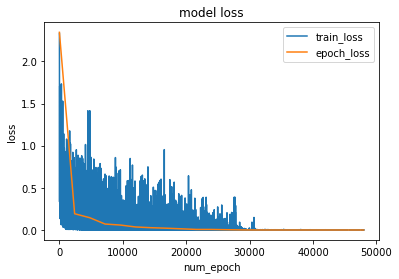

In [28]:
scratch_dnn3 = ScratchDeepNeuralNetworkClassifier(num_epoch=20, lr= 0.01, batch_size=20, 
                                                 n_features=784, n_nodes1 =400, n_nodes2=300, n_nodes3 =200,  n_output=10,
                                                 verbose = True, activater = Tanh, optimizer=SGD)

scratch_dnn3.fit(X_train_, y_train_)

In [31]:
y_pred3 = scratch_dnn3.predict(X_test)

In [32]:
evaluate(y_test, y_pred3)

accuracy =  0.9815
precision =  0.9814206468258186
recall =  0.9813149905260046
f1 =  0.9813629544287416
[[ 970    0    1    0    0    1    3    3    2    0]
 [   0 1126    2    2    0    1    2    0    2    0]
 [   3    0 1013    4    2    0    3    4    3    0]
 [   0    0    6  988    0    2    0    6    3    5]
 [   0    1    3    0  966    1    1    1    0    9]
 [   3    0    0    6    1  868    6    1    3    4]
 [   4    2    1    1    2    3  944    0    1    0]
 [   1    3    9    1    0    0    0 1004    2    8]
 [   2    0    2    3    5    4    0    4  952    2]
 [   2    2    0    4    8    3    1    4    1  984]]


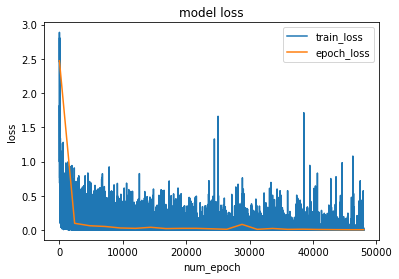

In [55]:
scratch_dnn4 = ScratchDeepNeuralNetworkClassifier(num_epoch=20, lr= 0.01, batch_size=20, 
                                                 n_features=784, n_nodes1 =400, n_nodes2=300, n_nodes3 =200,  n_output=10,
                                                 verbose = True, activater = ReLU, optimizer=SGD)

scratch_dnn4.fit(X_train_, y_train_)

In [56]:
y_pred4 = scratch_dnn4.predict(X_test)

In [57]:
evaluate(y_test, y_pred4)

accuracy =  0.9813
precision =  0.9812508575663103
recall =  0.9812085994554558
f1 =  0.9812184179355874
[[ 965    0    0    1    0    1    9    2    1    1]
 [   0 1127    4    0    0    0    1    2    1    0]
 [   4    0 1016    2    0    0    2    3    5    0]
 [   0    0    2  987    0    8    0    4    4    5]
 [   0    0    3    0  961    1    4    2    1   10]
 [   2    0    0    5    0  878    3    1    2    1]
 [   1    4    0    0    4    2  943    0    4    0]
 [   1    4   11    2    3    0    1  995    3    8]
 [   0    0    5    5    3    2    0    4  951    4]
 [   1    3    0    4    4    1    1    3    2  990]]


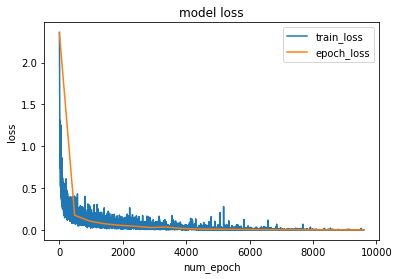

In [58]:
scratch_dnn5 = ScratchDeepNeuralNetworkClassifier(num_epoch=20, lr= 0.001, batch_size=100, 
                                                 n_features=784, n_nodes1 =400, n_nodes2=300, n_nodes3 =200,  n_output=10,
                                                 verbose = True, activater = ReLU, optimizer=SGD)

scratch_dnn5.fit(X_train_, y_train_)

In [59]:
y_pred5 = scratch_dnn5.predict(X_test)

In [60]:
evaluate(y_test, y_pred5)

accuracy =  0.9818
precision =  0.9817318041210041
recall =  0.981621417181689
f1 =  0.9816606198733886
[[ 970    1    1    0    0    1    3    1    2    1]
 [   0 1126    2    1    0    0    2    1    3    0]
 [   2    1 1007    5    2    1    2    5    7    0]
 [   0    0    1  995    0    3    0    2    5    4]
 [   1    1    4    0  970    0    2    0    0    4]
 [   2    1    1    7    2  867    5    1    3    3]
 [   3    2    0    1    5    4  940    0    3    0]
 [   0    3    8    3    1    0    0 1001    4    8]
 [   4    0    1    2    3    1    2    2  956    3]
 [   2    2    0    5    6    2    2    3    1  986]]


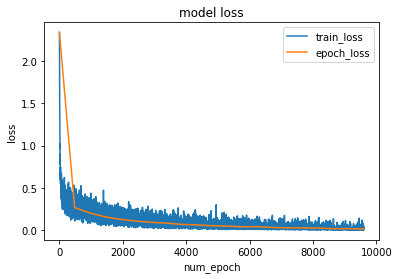

In [61]:
scratch_dnn6 = ScratchDeepNeuralNetworkClassifier(num_epoch=20, lr= 0.001, batch_size=100, 
                                                 n_features=784, n_nodes1 =400, n_nodes2=300, n_nodes3 =200,  n_output=10,
                                                 verbose = True, activater = Tanh, optimizer=SGD)

scratch_dnn6.fit(X_train_, y_train_)

In [62]:
y_pred6 = scratch_dnn6.predict(X_test)

In [63]:
evaluate(y_test, y_pred6)

accuracy =  0.9774
precision =  0.9772113641344301
recall =  0.9772592329132038
f1 =  0.9772191990442629
[[ 966    0    2    1    1    4    4    1    1    0]
 [   0 1123    3    2    0    1    2    2    2    0]
 [   2    0 1014    3    2    0    3    2    6    0]
 [   0    0    7  983    1    6    0    3    4    6]
 [   0    0    4    1  963    1    2    2    1    8]
 [   2    0    0    7    2  872    4    1    2    2]
 [   4    3    2    0    4    8  934    0    3    0]
 [   0    4   10    4    2    0    0  992    5   11]
 [   4    0    3    4    3    6    2    4  945    3]
 [   2    2    2    6    9    1    0    4    1  982]]


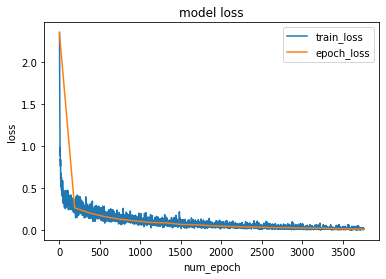

In [65]:
scratch_dnn7 = ScratchDeepNeuralNetworkClassifier(num_epoch=20, lr= 0.001, batch_size=256, 
                                                 n_features=784, n_nodes1 =400, n_nodes2=300, n_nodes3 =200,  n_output=10,
                                                 verbose = True, activater = Tanh, optimizer=SGD)

scratch_dnn7.fit(X_train_, y_train_)

In [66]:
y_pred7 = scratch_dnn7.predict(X_test)

In [67]:
evaluate(y_test, y_pred7)

accuracy =  0.9774
precision =  0.9773685595152433
recall =  0.9771456961130113
f1 =  0.9772403400726022
[[ 969    0    2    0    1    2    3    1    2    0]
 [   0 1124    2    2    0    1    2    2    2    0]
 [   3    0 1012    4    1    0    1    6    5    0]
 [   0    0    6  983    0    3    0    9    5    4]
 [   0    0    4    1  965    1    2    2    0    7]
 [   3    0    0   12    2  863    7    1    2    2]
 [   4    3    3    0    3    5  936    2    2    0]
 [   0    5    9    1    1    0    0 1002    4    6]
 [   3    0    2    9    1    5    2    4  946    2]
 [   4    2    1    7    7    1    1   10    2  974]]


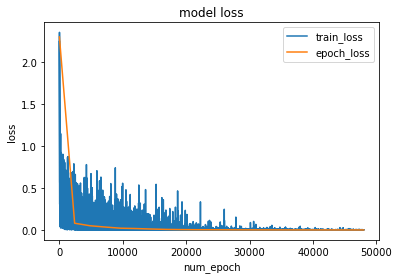

In [68]:
scratch_dnn8 = ScratchDeepNeuralNetworkClassifier(num_epoch=20, lr= 0.01, batch_size=20, 
                                                 n_features=784, n_nodes1 =400, n_nodes2=300, n_nodes3 =200,  n_output=10,
                                                 verbose = True, activater = ReLU, optimizer=AdaGrad)

scratch_dnn8.fit(X_train_, y_train_)

In [69]:
y_pred8 = scratch_dnn8.predict(X_test)

In [70]:
evaluate(y_test, y_pred8)

accuracy =  0.9803
precision =  0.9802149085161082
recall =  0.9800752843227081
f1 =  0.9801369543696037
[[ 969    0    0    1    1    1    3    1    3    1]
 [   0 1126    3    0    0    1    2    1    2    0]
 [   3    2 1010    2    2    0    0    4    9    0]
 [   0    0    6  989    0    3    0    1    7    4]
 [   2    0    3    0  965    0    4    2    0    6]
 [   2    0    0    8    1  868    6    1    3    3]
 [   4    3    1    0    6    4  937    0    3    0]
 [   1    4    7    3    1    0    0 1006    2    4]
 [   3    0    3    4    3    2    3    2  949    5]
 [   1    2    0    5    6    1    2    4    4  984]]


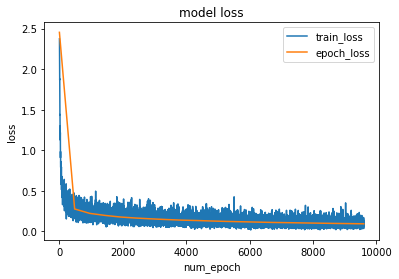

In [71]:
scratch_dnn9 = ScratchDeepNeuralNetworkClassifier(num_epoch=20, lr= 0.001, batch_size=100, 
                                                 n_features=784, n_nodes1 =400, n_nodes2=300, n_nodes3 =200,  n_output=10,
                                                 verbose = True, activater = ReLU, optimizer=AdaGrad)

scratch_dnn9.fit(X_train_, y_train_)

In [72]:
y_pred9 = scratch_dnn9.predict(X_test)

In [73]:
evaluate(y_test, y_pred9)

accuracy =  0.9653
precision =  0.9650757130706493
recall =  0.9649494033599509
f1 =  0.9649935909613404
[[ 968    0    2    1    1    2    3    1    2    0]
 [   0 1122    3    1    1    1    1    1    5    0]
 [   7    1  994    4    3    1    4    7   10    1]
 [   0    0    8  974    1    6    0    7    8    6]
 [   1    1    5    0  946    0    7    3    4   15]
 [   6    2    0    8    2  853    9    0   10    2]
 [   8    3    2    0    6    9  926    0    4    0]
 [   1    7   16    2    2    1    0  985    0   14]
 [   3    1    3   10    8    8    3    5  929    4]
 [   5    6    1   11   15    2    0    9    4  956]]


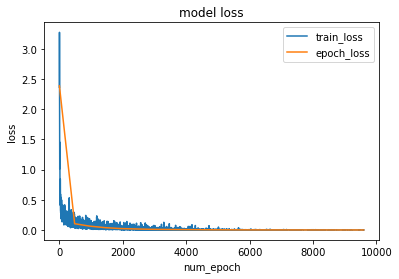

In [74]:
scratch_dnn10 = ScratchDeepNeuralNetworkClassifier(num_epoch=20, lr= 0.01, batch_size=100, 
                                                 n_features=784, n_nodes1 =400, n_nodes2=300, n_nodes3 =200,  n_output=10,
                                                 verbose = True, activater = ReLU, optimizer=AdaGrad)

scratch_dnn10.fit(X_train_, y_train_)

In [75]:
y_pred10 = scratch_dnn10.predict(X_test)

In [76]:
evaluate(y_test, y_pred10)

accuracy =  0.9817
precision =  0.9816063279522174
recall =  0.9815408148444427
f1 =  0.9815617147256497
[[ 971    0    0    2    1    0    2    1    3    0]
 [   0 1126    2    1    0    1    2    1    2    0]
 [   4    0 1011    3    1    0    4    3    6    0]
 [   0    0    3  993    0    5    0    1    6    2]
 [   1    0    3    0  969    0    3    2    0    4]
 [   2    0    0    8    2  871    4    1    2    2]
 [   3    2    2    1    3    2  942    0    3    0]
 [   1    2    9    4    2    0    0 1001    2    7]
 [   2    0    3    6    4    2    3    3  946    5]
 [   3    3    0    3    6    1    0    3    3  987]]
